In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats
import pandas
import itertools
from mpl_toolkits import basemap
import mpl_toolkits.axes_grid1
import random
import datetime
import time
import os

degree_sign = u'\u00B0'
mp.rcParams.update({'mathtext.default': 'regular'})
mp.rcParams['hatch.color'] = '0.5'

% matplotlib inline

# Set up lat/lon of locations of interest

In [2]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

Oroville_dam_lat = 39.5380
Oroville_dam_lon = 121.4831 # deg west
Oroville_dam_lon = 360 - Oroville_dam_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

# Import coastal grid point indices

In [3]:
cali_coast_latlon_indices = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/coastal_latlon_array_indices_3x.npy')
cali_coast_latlon_indices_zip = [i for i in zip(cali_coast_latlon_indices[:,0], cali_coast_latlon_indices[:,1])]

cali_coast_latlon_indices_3d = cali_coast_latlon_indices.reshape((11,3,2))
#print(cali_coast_latlon_indices_3d[0,:,:])

# Specify return period information and percentiles

In [4]:
#return_period = 200 # in years
#events_per_year = 151/40

return_period = 200
events_per_year = 151/40

return_val_perc = 100*(1-1/(return_period*events_per_year))
print(return_val_perc)

99.86754966887416


In [5]:
window=30
half_window=int(window/2)

# Set up directories where data are stored

In [6]:
working_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/'
#save_dir = '/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/calculations/npy_files/'
#latlon_indices = numpy.load(working_dir + 'ccal_latlon_indices_array.npy'); region='ccal'
#latlon_indices = numpy.load(working_dir + 'ncal_latlon_indices_array.npy'); region='ncal'
#latlon_indices = numpy.load(working_dir + 'scal_latlon_indices_array.npy'); region='scal'

PRECT_lat = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lat.npy')
PRECT_lon = numpy.load('/Users/baird/Dropbox/_analysis/attribution_2017/NEW_CALCULATIONS/npy_files/PRECT_lon.npy')

In [7]:
working_dir = '/Users/baird/google_drive/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/'
#threshold=0.0
threshold=0.1
#threshold=0.5
#threshold=1.0
#threshold=5.0
#threshold=10.0

# Import lat/lon information

In [8]:
PRECT_nlat = 26
PRECT_nlon = 25

latlon_indices = list(itertools.product(range(PRECT_nlat), range(PRECT_nlon)))
region = 'whole_domain'
window=30

days_per_season = 30+31+31+28+31

In [31]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

In [32]:
LA_lat_idx = geo_idx(LA_lat, PRECT_lat)
LA_lon_idx = geo_idx(LA_lon, PRECT_lon)

SF_lat_idx = geo_idx(SF_lat, PRECT_lat)
SF_lon_idx = geo_idx(SF_lon, PRECT_lon)

OD_lat_idx = geo_idx(Oroville_dam_lat, PRECT_lat)
OD_lon_idx = geo_idx(Oroville_dam_lon, PRECT_lon)

#REGION_lat_idx, REGION_lon_idx = SF_lat_idx, SF_lon_idx; REGION_NAME = 'SF'
REGION_lat_idx, REGION_lon_idx = LA_lat_idx, LA_lon_idx; REGION_NAME = 'LA'
#REGION_lat_idx, REGION_lon_idx = OD_lat_idx, OD_lon_idx; REGION_NAME = 'OD'

# Open PIC data

In [9]:
year_start_pic = 402 #time_subsets[chunk,0]
year_end_pic = 2200 #time_subsets[chunk,1]

# create season strings
years_pic = numpy.arange(year_start_pic, year_end_pic+1, 1).astype(numpy.int)
#half_years_pic = numpy.arange(year_start_pic+0.75, year_end_pic, 1)
#season_strings_pic = numpy.empty(years.size-1, dtype=numpy.str)

season_strings_pic = [str(years_pic[i])+'-'+str(years_pic[i+1]) for i in range(years_pic.size-1)]
member_strings_pic = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_pic=year_end_pic-year_start_pic

In [10]:
working_dir = '/Users/baird/Dropbox/_data_original/NCAR_LENS/daily/PRECT/calculated_npy_files/whole_domain/'

# Save all events as a numpy array, and save return period values

# Open all PIC events (which have already been saved as a npy array)

In [11]:
all_events_pic = numpy.load('csv_files/all_events_pic.npy')

# Open return period calculations

In [12]:
return_period_values_pic_df = pandas.read_csv('csv_files/return_period_values_pic_df_update.csv')
return_period_values_pic = return_period_values_pic_df.values[:,1:]

In [13]:
print(return_period_values_pic_df)

     Unnamed: 0            0      1
0             0   362.197806  267.0
1             1   336.077598  267.0
2             2   328.762059  267.0
3             3   307.488663  267.0
4             4   301.458560  267.0
5             5   277.368956  267.0
6             6   239.395205  267.0
7             7   226.115425  267.0
8             8   222.629654  267.0
9             9   218.048425  267.0
10           10   209.354619  267.0
11           11   198.520972  266.0
12           12   212.208580  266.0
13           13   190.435540  264.0
14           14   190.867870  267.0
15           15   187.565082  265.0
16           16   172.252956  266.0
17           17   169.236159  267.0
18           18   176.938227  255.0
19           19   195.502873  267.0
20           20   195.048131  267.0
21           21   201.574999  267.0
22           22   212.398038  266.0
23           23   247.561622  262.0
24           24   317.707136  267.0
25           25   385.855175  267.0
26           26   362.988875

# Open historical, RCP and place all data into a 4d array!

In [14]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]

In [15]:
year_start = 1920
year_end = 2100

year_start_list = numpy.arange(1920,2070)
year_end_list = numpy.arange(1950,2100)
year_middle_list = year_start_list+15

# create season strings
years = numpy.arange(year_start, year_end+1, 1).astype(numpy.int)
half_years_hist_rcp = numpy.arange(year_start+0.75, year_end, 1)
season_strings_hist_rcp = [str(i)+'-'+str(i+1) for i in range(year_start,year_end)]

thirty_yr_strings_hist_rcp = [str(year_start_list[i])+'-'+str(year_end_list[i]) for i in range(year_start_list.size)]
member_strings_hist_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist_rcp=year_end-year_start

In [16]:
all_events_hist_rcp_4d = numpy.load('csv_files/all_events_hist_rcp_4d.npy')

In [17]:
print(all_events_hist_rcp_4d.shape)

(650, 40, 180, 151)


In [18]:
event_count = numpy.load('csv_files/event_count.npy')

In [19]:
print(event_count.shape)

(650, 40, 180)


In [70]:
idx_2017_2018 = numpy.where(numpy.array((season_strings_hist_rcp))=='2017-2018')[0][0]
print(numpy.where(numpy.array((season_strings_hist_rcp))=='2017-2018')[0][0])
event_count_2017_2100 = event_count[:,:,idx_2017_2018:]
print(event_count_2017_2100.shape)

97
(650, 40, 83)


In [71]:
event_count_ens_mean = numpy.mean(event_count_2017_2100, axis=1)
event_count_year_sum = numpy.sum(event_count_ens_mean, axis=1)

In [72]:
event_count_year_sum_reshape = event_count_year_sum.reshape((PRECT_nlat, PRECT_nlon))

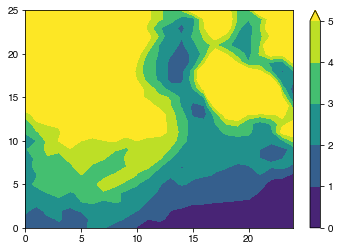

In [73]:
cf = mp.contourf(event_count_year_sum_reshape, levels=[0,1,2,3,4,5], extend='max')
mp.colorbar(cf)

# Create significance test

In [74]:
event_count_2017_2100.shape

(650, 40, 83)

In [75]:
event_count_across_years = numpy.sum(event_count_2017_2100, axis=2)
event_count_across_years_2d = event_count_across_years.reshape((PRECT_lat.size,PRECT_lon.size,40))

sig_test_gte_1 = numpy.sum(event_count_across_years>=1, axis=1)/40.
sig_test_gte_2 = numpy.sum(event_count_across_years>=2, axis=1)/40.

nmods_gte_1 = numpy.sum(event_count_across_years>=1, axis=1)
nmods_gte_2 = numpy.sum(event_count_across_years>=2, axis=1)

sig_test_gte_1_2d = sig_test_gte_1.reshape((PRECT_lat.size,PRECT_lon.size))
sig_test_gte_2_2d = sig_test_gte_2.reshape((PRECT_lat.size,PRECT_lon.size))

nmods_gte_1_2d = nmods_gte_1.reshape((PRECT_lat.size,PRECT_lon.size))
nmods_gte_2_2d = nmods_gte_2.reshape((PRECT_lat.size,PRECT_lon.size))

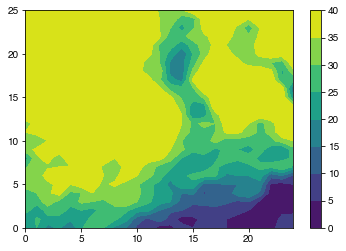

In [76]:
cf=mp.contourf(nmods_gte_2_2d)
mp.colorbar(cf)

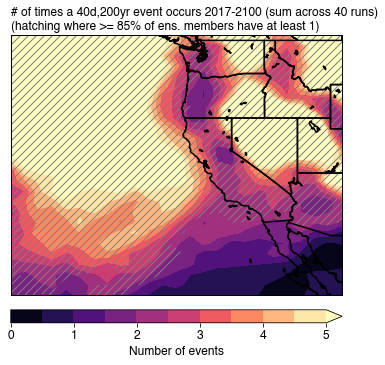

In [77]:
fontsize=12
contour_levels = numpy.arange(0,5.1,0.5)

fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

pr_map = map.contourf(xi, yi, event_count_year_sum_reshape, cmap='magma', levels=contour_levels, zorder=2, extend='max', latlon=True)

ax_sig = ax.contourf(xi, \
                    yi, \
                    sig_test_gte_1_2d, \
                    colors='None', \
                    levels=[0.0,0.85,1.0], \
                    hatches=[None,'///'], \
                    extend='lower', \
                    edgecolors='red', \
                    zorder=2)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('Number of events', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(contour_levels)

ax.text(s='# of times a 40d,200yr event occurs 2017-2100 (sum across 40 runs)\n(hatching where >= 85% of ens. members have at least 1)', x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()
mp.savefig('N_events_2017_2100_stippling_gte_1_event.pdf', transparent=True, bbox_inches='tight')

# plotting gte 2

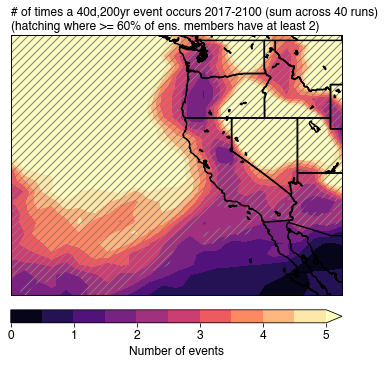

In [78]:
fontsize=12
contour_levels = numpy.arange(0,5.1,0.5)

fig = mp.figure(figsize=(5,5))

ax = fig.add_subplot(111)
map = basemap.Basemap(projection='cyl',ax=ax, llcrnrlat=PRECT_lat.min(),urcrnrlat=PRECT_lat.max(),llcrnrlon=PRECT_lon.min(),urcrnrlon=PRECT_lon.max(),resolution='i')
map.fillcontinents(color='0.75',lake_color='0.5')
map.drawmapboundary(fill_color='0')

map.drawcoastlines(linewidth=1.5, color='0', zorder=3)
map.drawstates(linewidth=1.5, color='0', zorder=3)
map.drawcountries(linewidth=1.5, color='0', zorder=3)

lons,lats = numpy.meshgrid(PRECT_lon, PRECT_lat)
xi,yi = map(lons, lats)

pr_map = map.contourf(xi, yi, event_count_year_sum_reshape, cmap='magma', levels=contour_levels, zorder=2, extend='max', latlon=True)

ax_sig = ax.contourf(xi, \
                    yi, \
                    sig_test_gte_2_2d, \
                    colors='None', \
                    levels=[0.0,0.6,1.0], \
                    hatches=[None,'///'], \
                    extend='lower', \
                    edgecolors='red', \
                    zorder=2)

divider = mpl_toolkits.axes_grid1.make_axes_locatable(ax)
cbar_ax = divider.append_axes('bottom', size='5%', pad=0.2) #fig.add_axes([0.0, -0.02, 1.0, 0.03])
cbar = fig.colorbar(pr_map, cax=cbar_ax, orientation='horizontal')

cbar.set_label('Number of events', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
#cbar.set_ticks(contour_levels)

ax.text(s='# of times a 40d,200yr event occurs 2017-2100 (sum across 40 runs)\n(hatching where >= 60% of ens. members have at least 2)', x=0, y=1.01, transform=ax.transAxes, fontsize=fontsize, ha='left', va='bottom')

fig.tight_layout()
mp.savefig('N_events_2017_2100_stippling_gte_2_events.pdf', transparent=True, bbox_inches='tight')

# Save netcdf file

In [29]:
# save hist clim
filename = '200yr_40d_N_event_map.nc'
if os.path.isfile(filename):
    os.remove(filename)
    print('removed '+filename)

ncfile = netCDF4.Dataset(filename, 'w', format='NETCDF4')

lat_dim = ncfile.createDimension('lat', PRECT_lat.size)
lon_dim = ncfile.createDimension('lon', PRECT_lon.size)
ens_dim = ncfile.createDimension('ens', 40)

lat_var = ncfile.createVariable('lat', 'f4', ('lat',))
lon_var = ncfile.createVariable('lon', 'f4', ('lon',))
lat_var[:] = PRECT_lat
lon_var[:] = PRECT_lon
lat_var.units = 'degrees_north'
lon_var.units = 'degrees_east'
ens_var = ncfile.createVariable('ens', 'S1', ('ens',))
ens_var[:] = ensemble_names

events_count = ncfile.createVariable('N_events_count_mean', 'f4', ('lat','lon',))
events_count[:] = event_count_year_sum_reshape
events_count.units = 'number of models'
events_count.description = 'Number of 200yr 40d events from 2017-2018 wet season onward in the NCAR Large Ensemble (averaged across 40 different realizations)'

n_gte_1_count = ncfile.createVariable('nmods_gte_1', 'f4', ('lat','lon',))
n_gte_1_count[:] = nmods_gte_1_2d[:]
n_gte_1_count.units = 'number of models'
n_gte_1_count.description = 'Number of ensemble members (out of 40 total) that have at least one 200yr 40d event after 2017-2018'

n_gte_2_count = ncfile.createVariable('nmods_gte_2', 'f4', ('lat','lon',))
n_gte_2_count[:] = nmods_gte_2_2d[:]
n_gte_2_count.units = 'number of models'
n_gte_2_count.description = 'Number of ensemble members (out of 40 total) that have at least two 200yr 40d events after 2017-2018'

all_event_counts = ncfile.createVariable('individual_ens_member_counts', 'f4', ('ens','lat','lon'))
all_event_counts[:] = event_count_across_years_2d.transpose((2,0,1))
all_event_counts.units = 'number of events'
all_event_counts.description = 'Number of events for each ensemble member after 2017-2018 wet season'

ncfile.close()

removed 200yr_40d_N_event_map.nc


# Create time series for D Swain

In [79]:
year_list = numpy.arange(2018,2101)
time_datetime = [datetime.datetime(i,1,15) for i in year_list]

In [92]:
print(event_count_across_years_2d.shape)
print(event_count.shape)

(26, 25, 40)
(650, 40, 180)


In [81]:
event_count_2d = numpy.reshape(event_count, (PRECT_nlat,PRECT_nlon,40,180))
event_count_2d_2017_2100 = numpy.reshape(event_count_2017_2100, (PRECT_nlat,PRECT_nlon,40,-1))

In [82]:
event_count_2d = numpy.transpose(event_count_2d, (3,2,0,1))
event_count_2d_2017_2100 = numpy.transpose(event_count_2d_2017_2100, (3,2,0,1))
print(event_count_2d_2017_2100.shape)

(83, 40, 26, 25)


In [90]:
event_count_2d_2017_2100_LA = event_count_2d_2017_2100[:,:,LA_lat_idx,LA_lon_idx-1:LA_lon_idx+1]

# calculate mean perc change (gpm = grid point mean)
event_count_2d_2017_2100_LA_gpm = numpy.mean(event_count_2d_2017_2100_LA, axis=2)

# 180yr percent change time series for 100yr wet, 100yr dry, 80/20 whipLAsh
column_names = ['Sum across all 40 members', 'Cumulative sum'] + ensemble_names

all_ens_sum = numpy.sum(event_count_2d_2017_2100_LA_gpm, axis=1)
all_ens_cumsum = numpy.cumsum(all_ens_sum)

df_array = numpy.column_stack((all_ens_sum, all_ens_cumsum, event_count_2d_2017_2100_LA_gpm))
df_array = pandas.DataFrame(df_array, columns=column_names, index=time_datetime)
df_array.to_csv('N_200yr_events_LA_2gdpts.csv')

# ==================================================

event_count_2d_2017_2100_LA = event_count_2d_2017_2100[:,:,LA_lat_idx-1:LA_lat_idx+2,LA_lon_idx-1:LA_lon_idx+2]

# calculate mean perc change (gpm = grid point mean)
event_count_2d_2017_2100_LA_gpm = numpy.mean(event_count_2d_2017_2100_LA, axis=2)
event_count_2d_2017_2100_LA_gpm = numpy.mean(event_count_2d_2017_2100_LA_gpm, axis=2)

# 180yr percent change time series for 100yr wet, 100yr dry, 80/20 whipLAsh
column_names = ['Sum across all 40 members', 'Cumulative sum'] + ensemble_names

all_ens_sum = numpy.sum(event_count_2d_2017_2100_LA_gpm, axis=1)
all_ens_cumsum = numpy.cumsum(all_ens_sum)

df_array = numpy.column_stack((all_ens_sum, all_ens_cumsum, event_count_2d_2017_2100_LA_gpm))
df_array = pandas.DataFrame(df_array, columns=column_names, index=time_datetime)
df_array.to_csv('N_200yr_events_LA_3x3gdpts.csv')

# ==================================================

event_count_2d_2017_2100_LA = event_count_2d_2017_2100[:,:,LA_lat_idx,LA_lon_idx]

# calculate mean perc change (gpm = grid point mean)
event_count_2d_2017_2100_LA_gpm = numpy.copy(event_count_2d_2017_2100_LA)

# 180yr percent change time series for 100yr wet, 100yr dry, 80/20 whipLAsh
column_names = ['Sum across all 40 members', 'Cumulative sum'] + ensemble_names

all_ens_sum = numpy.sum(event_count_2d_2017_2100_LA_gpm, axis=1)
all_ens_cumsum = numpy.cumsum(all_ens_sum)

df_array = numpy.column_stack((all_ens_sum, all_ens_cumsum, event_count_2d_2017_2100_LA_gpm))
df_array = pandas.DataFrame(df_array, columns=column_names, index=time_datetime)
df_array.to_csv('N_200yr_events_LA_1gdpt.csv')

In [93]:
event_count_2d_2017_2100_SF = event_count_2d_2017_2100[:,:,SF_lat_idx,SF_lon_idx-1:SF_lon_idx+1]

# calculate mean perc change (gpm = grid point mean)
event_count_2d_2017_2100_SF_gpm = numpy.mean(event_count_2d_2017_2100_SF, axis=2)

# 180yr percent change time series for 100yr wet, 100yr dry, 80/20 whipSFsh
column_names = ['Sum across all 40 members', 'Cumulative sum'] + ensemble_names

all_ens_sum = numpy.sum(event_count_2d_2017_2100_SF_gpm, axis=1)
all_ens_cumsum = numpy.cumsum(all_ens_sum)

df_array = numpy.column_stack((all_ens_sum, all_ens_cumsum, event_count_2d_2017_2100_SF_gpm))
df_array = pandas.DataFrame(df_array, columns=column_names, index=time_datetime)
df_array.to_csv('N_200yr_events_SF_2gdpts.csv')

# ==================================================

event_count_2d_2017_2100_SF = event_count_2d_2017_2100[:,:,SF_lat_idx-1:SF_lat_idx+2,SF_lon_idx-1:SF_lon_idx+2]

# calculate mean perc change (gpm = grid point mean)
event_count_2d_2017_2100_SF_gpm = numpy.mean(event_count_2d_2017_2100_SF, axis=2)
event_count_2d_2017_2100_SF_gpm = numpy.mean(event_count_2d_2017_2100_SF_gpm, axis=2)

# 180yr percent change time series for 100yr wet, 100yr dry, 80/20 whipSFsh
column_names = ['Sum across all 40 members', 'Cumulative sum'] + ensemble_names

all_ens_sum = numpy.sum(event_count_2d_2017_2100_SF_gpm, axis=1)
all_ens_cumsum = numpy.cumsum(all_ens_sum)

df_array = numpy.column_stack((all_ens_sum, all_ens_cumsum, event_count_2d_2017_2100_SF_gpm))
df_array = pandas.DataFrame(df_array, columns=column_names, index=time_datetime)
df_array.to_csv('N_200yr_events_SF_3x3gdpts.csv')

# ==================================================

event_count_2d_2017_2100_SF = event_count_2d_2017_2100[:,:,SF_lat_idx,SF_lon_idx]

# calculate mean perc change (gpm = grid point mean)
event_count_2d_2017_2100_SF_gpm = numpy.copy(event_count_2d_2017_2100_SF)

# 180yr percent change time series for 100yr wet, 100yr dry, 80/20 whipSFsh
column_names = ['Sum across all 40 members', 'Cumulative sum'] + ensemble_names

all_ens_sum = numpy.sum(event_count_2d_2017_2100_SF_gpm, axis=1)
all_ens_cumsum = numpy.cumsum(all_ens_sum)

df_array = numpy.column_stack((all_ens_sum, all_ens_cumsum, event_count_2d_2017_2100_SF_gpm))
df_array = pandas.DataFrame(df_array, columns=column_names, index=time_datetime)
df_array.to_csv('N_200yr_events_SF_1gdpt.csv')